In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
df = pd.read_html(url)[0]

match = 'Коефіцієнт народжуваності в регіонах України'
tables = pd.read_html('https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8',
                     thousands="",
                     decimal=",",
                     match=match
                    )

Виведення перших рядків таблиці

In [32]:
print("Перші рядки таблиці:")
print(df.head())

Перші рядки таблиці:
                                   Населення України   
0  Статево-вікова піраміда населення України на 1...  \
1                                        Чисельність   
2                                            Густота   
3                                Коефіцієнт міграції   
4                                      Природний рух   

                                 Населення України.1  
0  Статево-вікова піраміда населення України на 1...  
1                   ▼ 40,96 млн (1 лютого 2022) осіб  
2                                   ▼ 68,2 особи/км²  
3                                             ▲0,9 ‰  
4                                      Природний рух  


Визначення кількості рядків та стовпців

In [33]:
rows, columns = df.shape
print(f"\nКількість рядків: {rows}, Кількість стовпців: {columns}")


Кількість рядків: 29, Кількість стовпців: 2


Заміна значень "—" на NaN

In [34]:
df.replace("—", np.nan, inplace=True)

Визначення типів стовпців

In [35]:
print("\nТипи стовпців:")
print(df.dtypes)


Типи стовпців:
Населення України      object
Населення України.1    object
dtype: object


Заміна типів нечислових колонок на числові

In [36]:
non_numeric_columns = df.columns[df.dtypes == object]
df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

Частка пропусків в кожній колонці

In [37]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nЧастка пропусків в кожній колонці:")
print(missing_percentage)


Частка пропусків в кожній колонці:
Населення України      100.0
Населення України.1    100.0
dtype: float64


Видалення останнього рядка

In [38]:
df.drop(df.tail(1).index, inplace=True)

Заміна відсутніх даних середніми значеннями

In [39]:
df.fillna(df.mean(), inplace=True)

Список регіонів з народжуваністю вище середньої у 2019 році

Регіони з народжуваністю вище середньої у 2019 році:
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ', 'Україна']


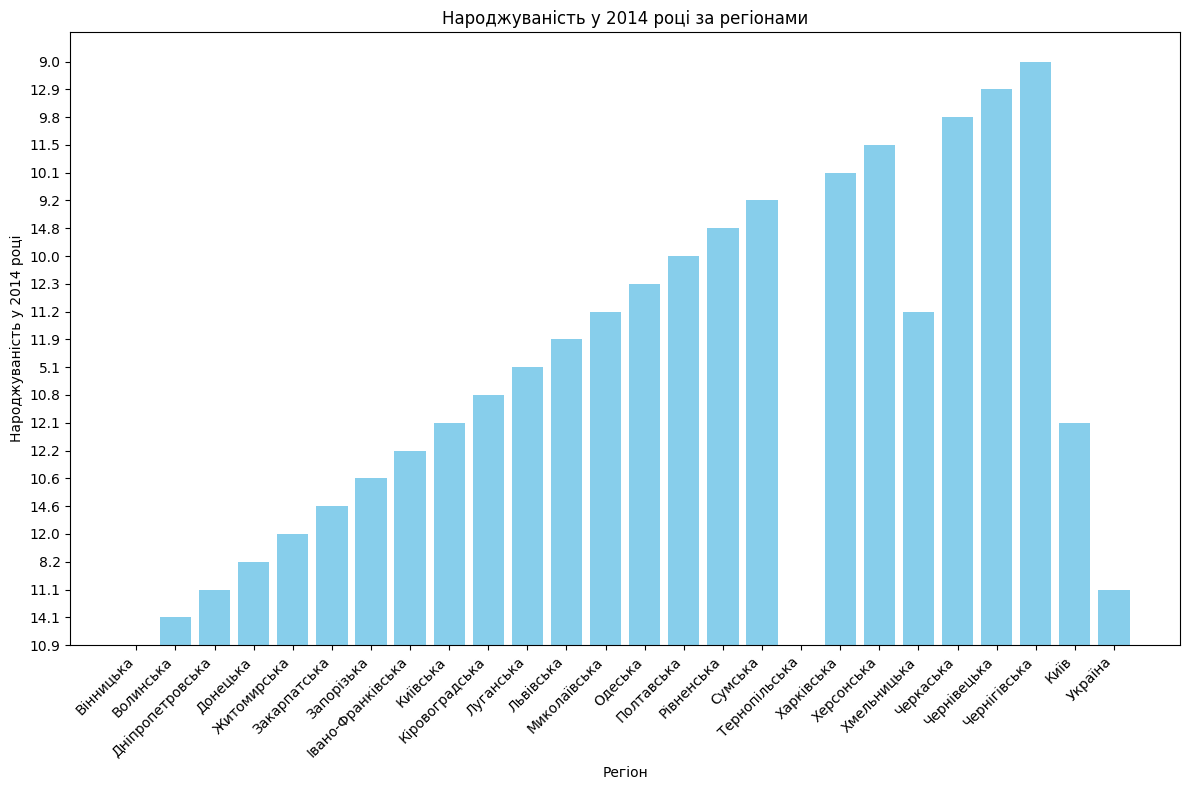

In [4]:
table = tables[0]
table = table.replace("—", float("nan"))
average_birth_rate_2019 = pd.to_numeric(table["2019"], errors="coerce").mean()
regions_above_average_2019 = table[pd.to_numeric(table["2019"], errors="coerce") > average_birth_rate_2019]["Регіон"]
print("Регіони з народжуваністю вище середньої у 2019 році:")
print(regions_above_average_2019.tolist())

%matplotlib inline
table = table.dropna(subset=["2014"])
plt.figure(figsize=(12, 8))
plt.bar(table["Регіон"], table["2014"], color='skyblue')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність у 2014 році')
plt.title('Народжуваність у 2014 році за регіонами')
plt.xticks(rotation=45, ha="right")  # Обертаємо підписи осі X для зручності
plt.tight_layout()
plt.show()

У якому регіоні була найвища народжуваність у 2014 році?


Регіон з найвищою народжуваністю у 2014 році: Рівненська


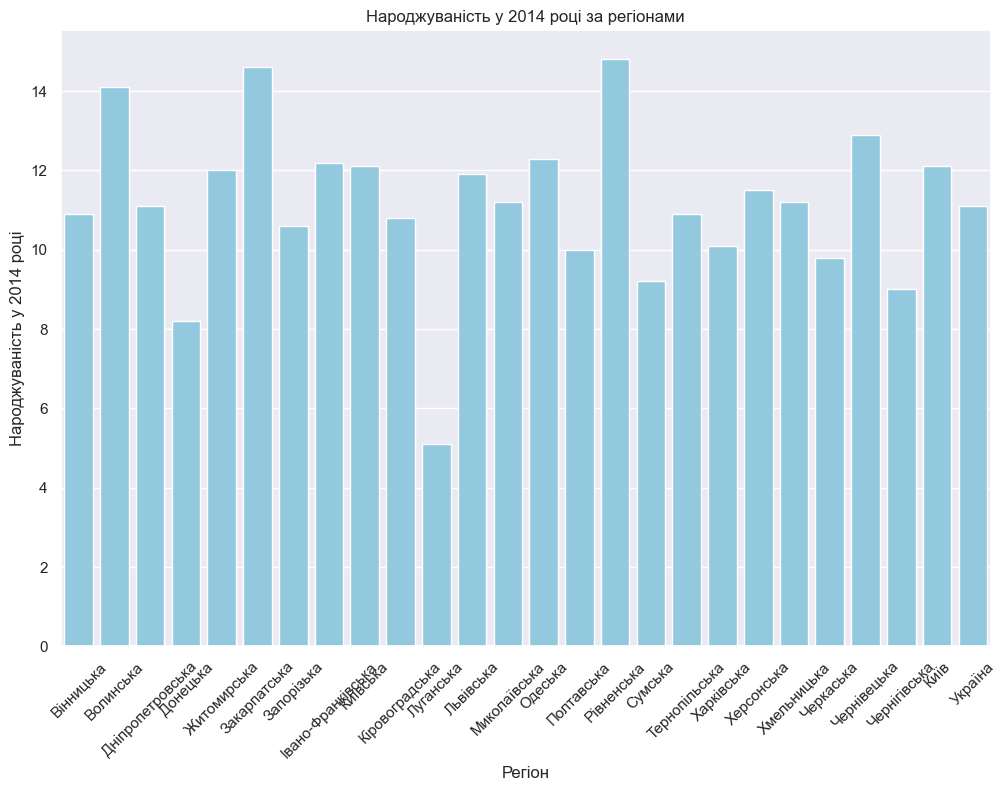

In [8]:
import seaborn as sns

table = table.replace("—", float("nan"))
numeric_columns = table.columns[1:]
table[numeric_columns] = table[numeric_columns].apply(pd.to_numeric, errors="coerce")
region_highest_birth_rate_2014 = table.loc[table["2014"].idxmax()]["Регіон"]
print("\nРегіон з найвищою народжуваністю у 2014 році:", region_highest_birth_rate_2014)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,8)})

%matplotlib inline
plt.figure(figsize=(12, 8))
sns.barplot(x='Регіон', y='2014', data=table, color='skyblue')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність у 2014 році')
plt.title('Народжуваність у 2014 році за регіонами')
plt.xticks(rotation=45)
plt.show()

Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

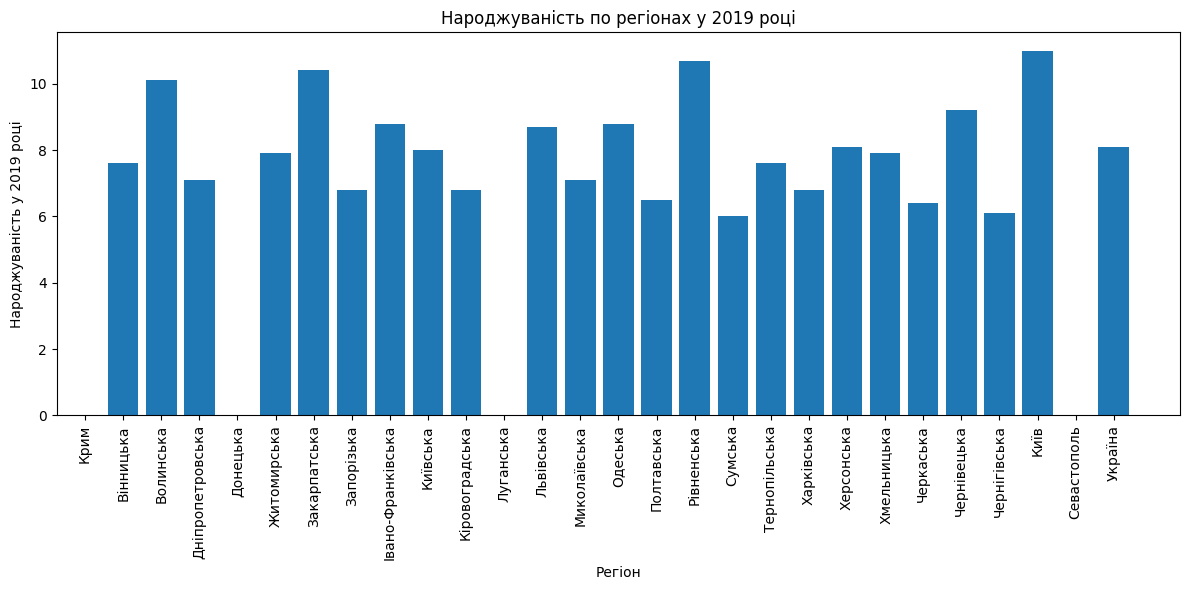

In [64]:
import matplotlib.pyplot as plt

table = table.replace("—", float("nan"))
numeric_columns = table.columns[1:]
table[numeric_columns] = table[numeric_columns].apply(pd.to_numeric, errors="coerce")
plt.figure(figsize=(12, 6))
plt.bar(table["Регіон"], table["2019"])
plt.title("Народжуваність по регіонах у 2019 році")
plt.xlabel("Регіон")
plt.ylabel("Народжуваність у 2019 році")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()